<br><center style="font-size:36px; font-weight:bold;">Tugas Besar 2</center><br>
<center style="font-size:25px;">IF3170 - Artificial Intelligence</center><br><br><br>
<center style="font-size:20px;">hani sendiri</center><br>
<center style="font-size:18px">Sekar Annisa Ayuningtyas - 13516044</center><br>
<center style="font-size:18px">Hani'ah Wafa - 13516053</center><br>
<center style="font-size:18px">Dinda Yora Islami - 13516067</center><br>
<center style="font-size:18px">Muhammad Alif Arifin - 13516078</center><br>
<center style="font-size:18px">Deborah Aprilia Josephine - 13516152</center>

In [1]:
# library
import pandas as pd
import numpy as np
import copy

# model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# count z-value
from scipy import stats

# save model
from sklearn.externals import joblib

# count std
import statistics

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# model selection
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# membaca data
df = pd.read_csv('tubes2_HeartDisease_train.csv')

In [3]:
# melihat data sekilas
df.head()

Column1  Column2  Column3 Column4 Column5 Column6 Column7 Column8 Column9  \
0       54        1        4     125     216       0       0     140       0   
1       55        1        4     158     217       0       0     110       1   
2       54        0        3     135     304       1       0     170       0   
3       48        0        3     120     195       0       0     125       0   
4       50        1        4     120       0       0       1     156       1   

  Column10 Column11 Column12 Column13  Column14  
0        0        ?        ?        ?         1  
1      2.5        2        ?        ?         1  
2        0        1        0        3         0  
3        0        ?        ?        ?         0  
4        0        1        ?        6         3

In [4]:
# menyimpan daftar atribut
features = list(df)

Pengukuran kinerja dilakukan dengan accuracy

## Penanganan yang dilakukan
1. Mengubah '?' menjadi NaN lalu mengecek column dengan 2 kondisi
    - Apabila NaN terlalu banyak maka di-drop
    - Selain itu mengganti NaN dengan value
        - Categorical data = modus
        - Numerical data = mean/median
2. Mencari outlier lalu membuang data tersebut. Mencari dengan:
    - Melihat data: column 4 dan 5 terdapat outlier (data bernilai 0) maka dibuang
    - Z-value dengan threshold = +-3 (apabila Z-value > +3 atau Z-value < - 3 (threshold) maka dibuang)
3. Memilih atribut yang significant
    - Menggunakan chi squared
    - Menggunakan tree based

#### Penanganan 1

In [5]:
# mengganti '?' ke NaN
df = df.replace('?', np.nan)

In [6]:
# melihat head untuk memastikan sudah terganti
df.head()

Column1  Column2  Column3 Column4 Column5 Column6 Column7 Column8 Column9  \
0       54        1        4     125     216       0       0     140       0   
1       55        1        4     158     217       0       0     110       1   
2       54        0        3     135     304       1       0     170       0   
3       48        0        3     120     195       0       0     125       0   
4       50        1        4     120       0       0       1     156       1   

  Column10 Column11 Column12 Column13  Column14  
0        0      NaN      NaN      NaN         1  
1      2.5        2      NaN      NaN         1  
2        0        1        0        3         0  
3        0      NaN      NaN      NaN         0  
4        0        1      NaN        6         3

In [7]:
# menghitung jumlah NaN dan dibandingkan dengan jumlah row
print('Shape dataframe')
print(df.shape)
print('Null Value pada dataframe')
print(df.isnull().sum())

Shape dataframe
(779, 14)
Null Value pada dataframe
Column1       0
Column2       0
Column3       0
Column4      47
Column5      24
Column6      78
Column7       2
Column8      44
Column9      44
Column10     49
Column11    262
Column12    514
Column13    408
Column14      0
dtype: int64


Terlihat apabila atribut Column 12 dan 13 cukup banyak Null value-nya maka di-drop

In [8]:
# Column 12 dan 13 terlalu banyak yang tidak diketahui maka di-drop saja
df = df.drop(columns=['Column12', 'Column13'])

In [9]:
# mengganti type dari object ke numeric
object_type = ['Column4','Column5','Column6','Column7','Column8','Column9','Column10','Column11']
df[object_type] = df[object_type].apply(pd.to_numeric, downcast='float', errors='coerce', axis=1)

In [10]:
median_type = ['Column4', 'Column5', 'Column8']
mode_type = ['Column6', 'Column7', 'Column9', 'Column11']
mean_type = ['Column10']

default_value = {}

for feature in median_type :
    df[feature] = df[feature].fillna(df[feature].median())
    default_value[feature] = df[feature].median()
    
for feature in mode_type :
    df[feature] = df[feature].fillna(df[feature].mode()[0])
    default_value[feature] = df[feature].mode()[0]

for feature in mean_type :
    df[feature] = df[feature].fillna(df[feature].mean())
    default_value[feature] = df[feature].mean()

In [11]:
# Memastikan null value telah kosong
print('Null Value pada dataframe')
print(df.isnull().sum())

Null Value pada dataframe
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column14    0
dtype: int64


In [12]:
# mengganti type sesuai dengan yang seharusnya
float_type = ['Column10']
int_type = ['Column4','Column5','Column6','Column7','Column8','Column9','Column11']

df[float_type] = df[float_type].astype(float)
df[int_type] = df[int_type].astype(int)

In [13]:
print('Tipe data')
print(df.dtypes)

Tipe data
Column1       int64
Column2       int64
Column3       int64
Column4       int32
Column5       int32
Column6       int32
Column7       int32
Column8       int32
Column9       int32
Column10    float64
Column11      int32
Column14      int64
dtype: object


#### Penanganan 2

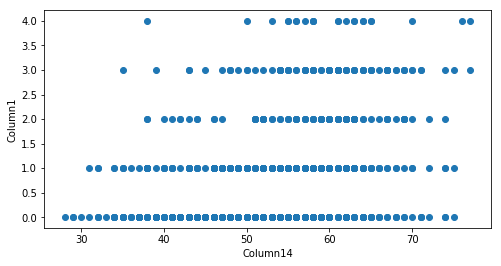

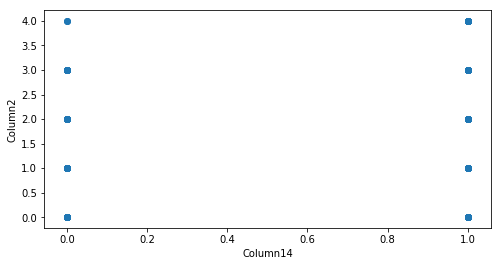

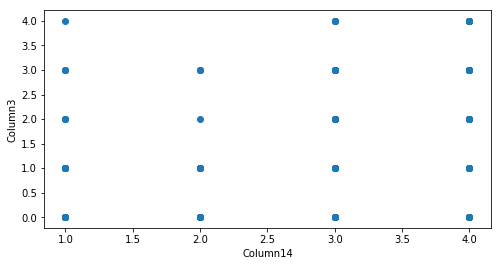

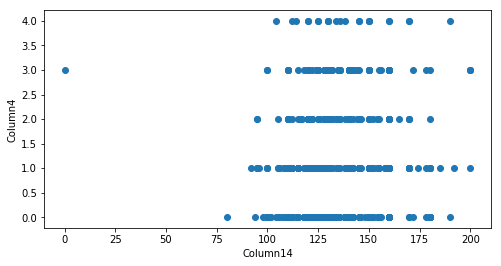

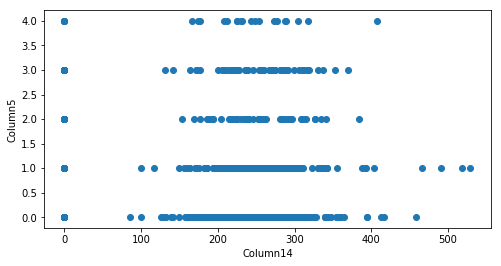

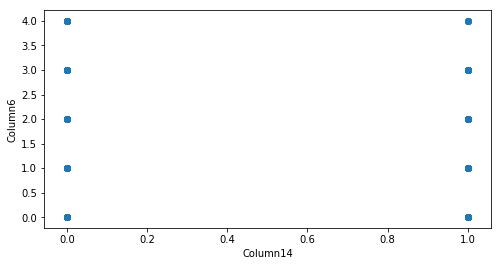

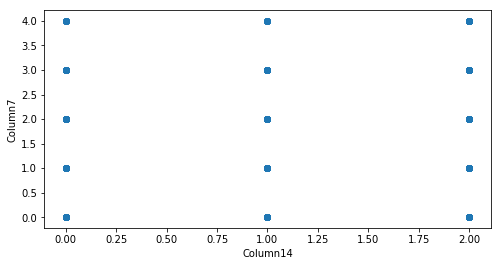

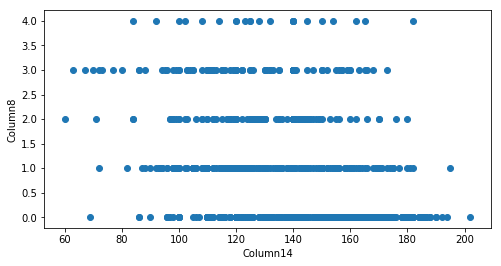

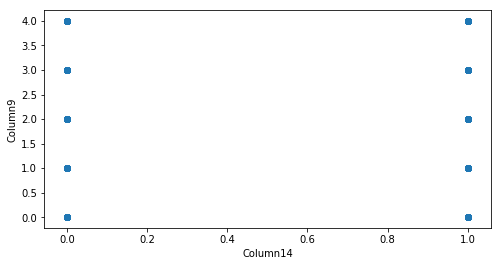

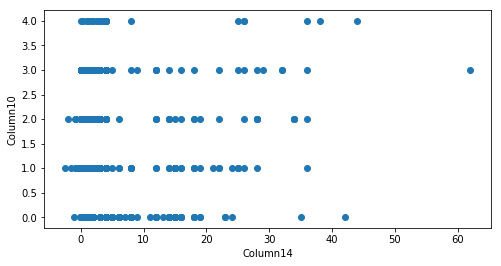

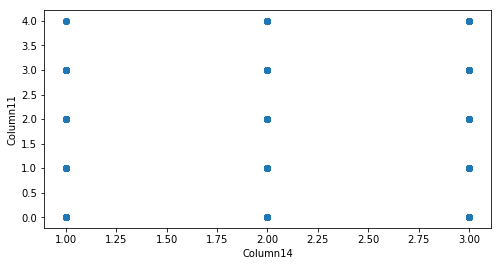

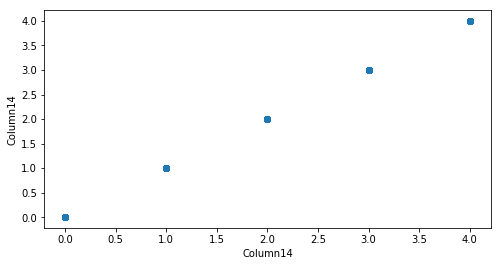

In [14]:
# Melihat persebaran data
for column in list(df) :
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(df[column], df['Column14'])
    ax.set_xlabel('Column14')
    ax.set_ylabel(column)
    plt.show()

Terlihat bahwa column 4 dan 5 banyak mengandung outlier, maka row dengan nilai 0 akan dibuang

In [15]:
df_clean = df[df['Column4'] > 1]
df_clean = df_clean[df_clean['Column5'] > 1]

df_clean.shape
df_clean['Column14'].value_counts()

0    331
1    173
3     56
2     55
4     19
Name: Column14, dtype: int64

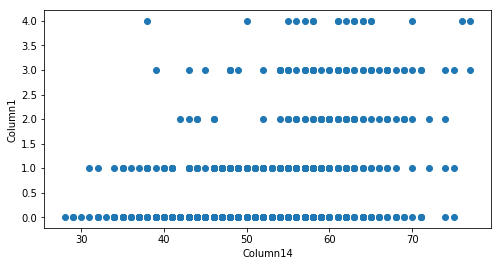

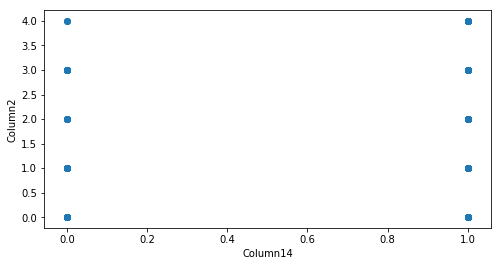

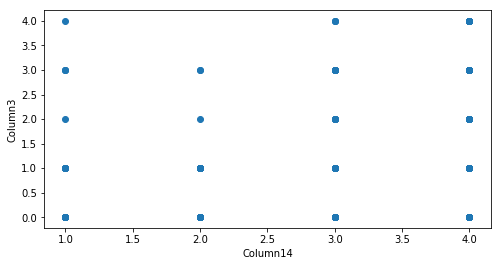

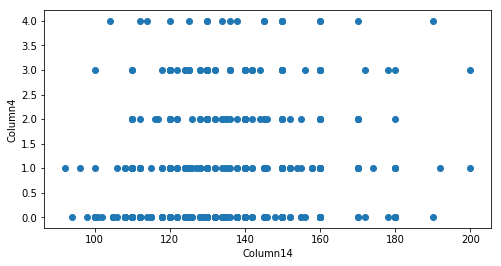

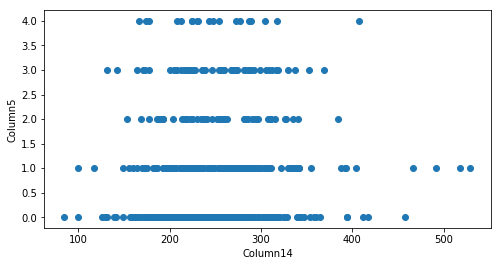

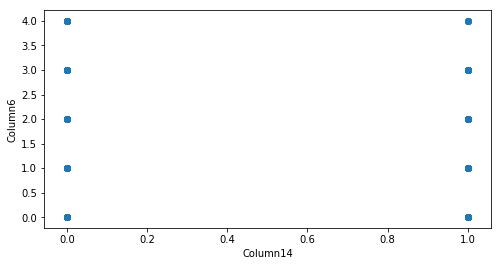

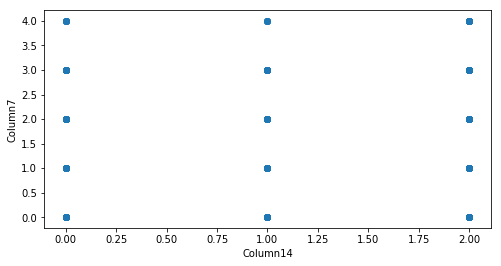

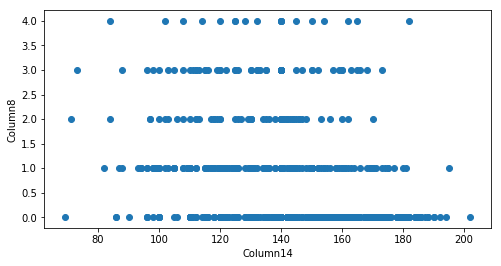

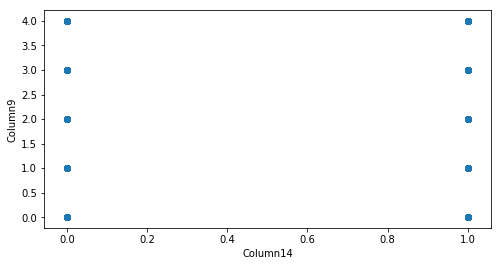

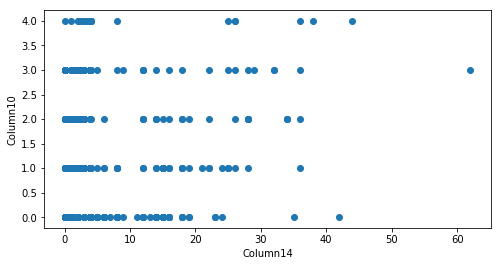

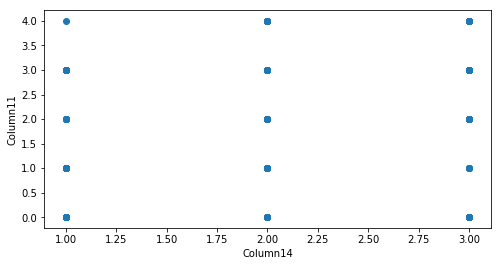

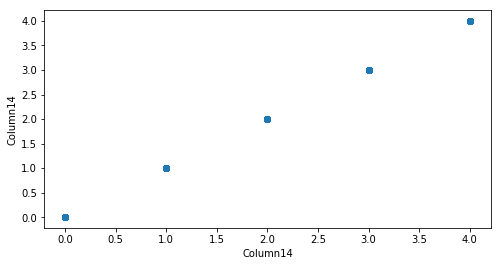

In [16]:
# Melihat persebaran data untuk memastikan saja
for column in list(df_clean) :
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(df_clean[column], df_clean['Column14'])
    ax.set_xlabel('Column14')
    ax.set_ylabel(column)
    plt.show()

In [17]:
# Menghitung z value untuk masing-masing data
z = np.abs(stats.zscore(df_clean))
threshold = 3

In [18]:
# Membuang yang memiliki z >= threshold
df_clean = df_clean[(z < threshold).all(axis=1)]

In [19]:
# Mengecek banyak row
print('Dataframe shape')
print(df_clean.shape)
# Mengecek persebaran nilai pada Column14
print(df_clean['Column14'].value_counts())

Dataframe shape
(609, 12)
0    326
1    166
3     51
2     51
4     15
Name: Column14, dtype: int64


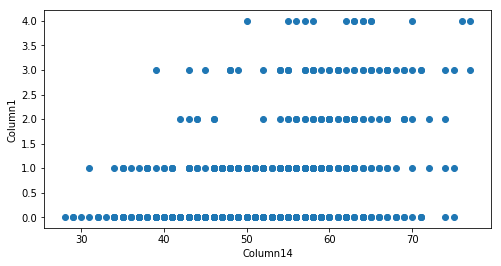

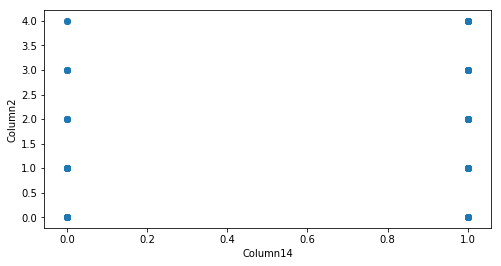

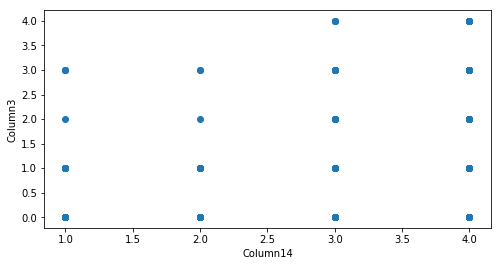

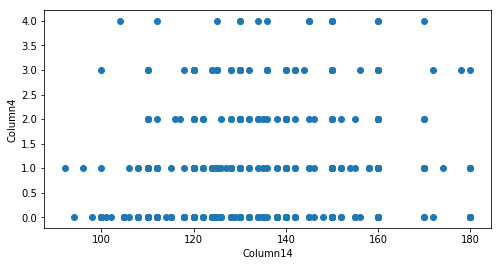

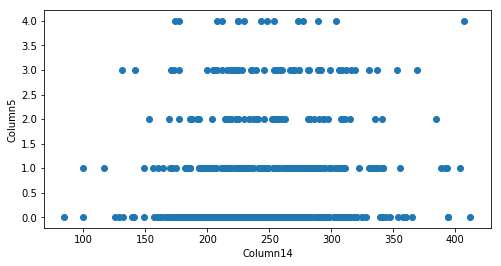

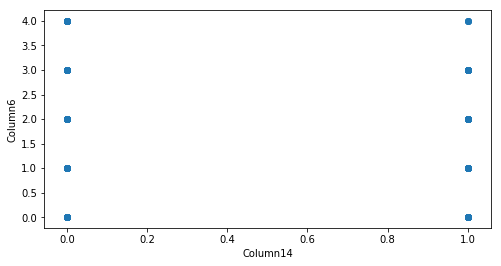

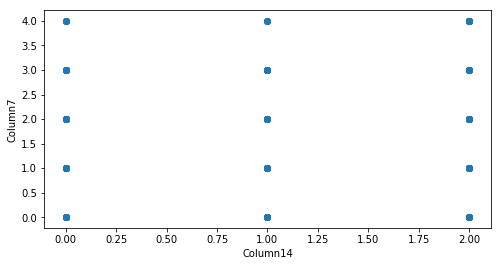

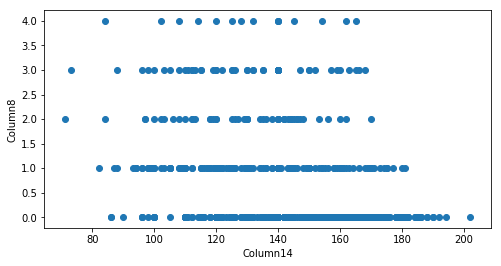

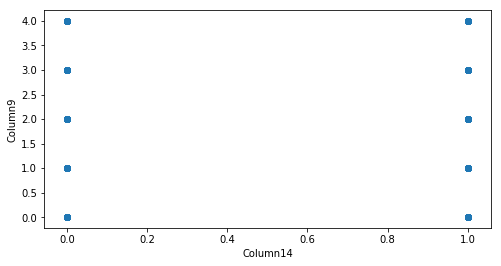

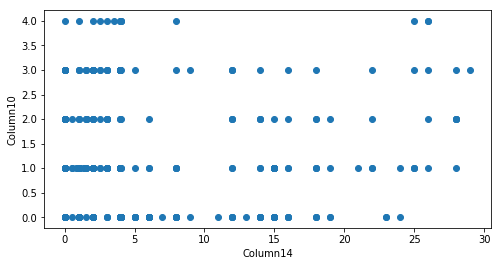

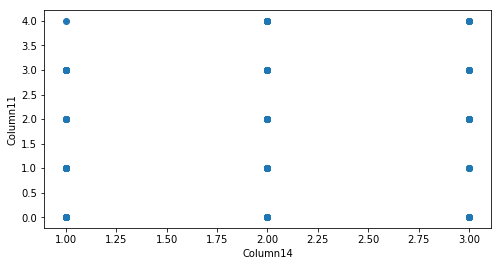

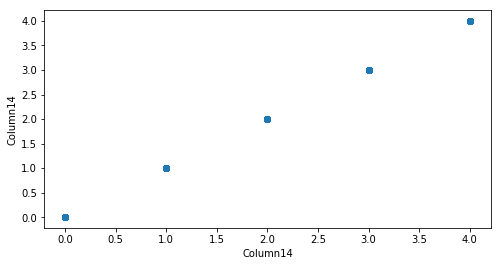

In [20]:
# Melihat persebaran data untuk memastikan saja
for column in list(df_clean) :
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(df_clean[column], df_clean['Column14'])
    ax.set_xlabel('Column14')
    ax.set_ylabel(column)
    plt.show()

#### Penanganan 3

In [21]:
# Menggunakan chi squared untuk menentukan atribut yang paling penting
# Melihat deskripsi data dan memastikan tidak ada yang negatif
df_clean.describe()

Column1     Column2     Column3     Column4     Column5     Column6  \
count  609.000000  609.000000  609.000000  609.000000  609.000000  609.000000   
mean    52.852217    0.742200    3.169130  132.027915  244.571429    0.152709   
std      9.583145    0.437783    0.950744   16.192638   50.362782    0.360003   
min     28.000000    0.000000    1.000000   92.000000   85.000000    0.000000   
25%     46.000000    0.000000    2.000000  120.000000  213.000000    0.000000   
50%     54.000000    1.000000    3.000000  130.000000  238.000000    0.000000   
75%     59.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  180.000000  412.000000    1.000000   

          Column7     Column8     Column9    Column10    Column11    Column14  
count  609.000000  609.000000  609.000000  609.000000  609.000000  609.000000  
mean     0.628900  141.704433    0.348112    3.880043    1.816092    0.789819  
std      0.831267   24.255995    0.476763    6.501697    0.489028    1.064605  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  125.000000    0.000000    0.000000    2.000000    0.000000  
50%      0.000000  140.000000    0.000000    1.000000    2.000000    0.000000  
75%      1.000000  160.000000    1.000000    3.937396    2.000000    1.000000  
max      2.000000  202.000000    1.000000   29.000000    3.000000    4.000000

In [22]:
df_X = df_clean.drop(columns=['Column14'])
df_y = df_clean['Column14']

In [23]:
print('Daftar features')
print(list(df_X))
print('Nilai chi2')
print(chi2(df_X, df_y))

Daftar features
['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11']
Nilai chi2
(array([176.48669525,  15.17741138,  37.54151114,  32.21896859,
        78.44310508,  20.56504346,  28.6778807 , 376.98521773,
       100.8210359 , 499.16817699,   6.31248291]), array([4.23620447e-037, 4.34705080e-003, 1.39311735e-007, 1.72574564e-006,
       3.72181679e-016, 3.86156840e-004, 9.08809143e-006, 2.60790860e-080,
       6.57721749e-021, 1.01382054e-106, 1.76995621e-001]))


Berdasarkan perhitungan didapatkan ranking dari feature<br>
Feature ranking
1. Column10 = 499
2. Column8 = 376
3. Column1 = 176
4. Column9 = 100
5. Column5 = 78
6. Column3 = 37
7. Column4 = 32
8. Column7 = 28<br>
dst

List features
['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11']
Value (semakin besar semakin baik)
[0.16365279 0.02863107 0.13027959 0.09601238 0.210912   0.03408692
 0.04596984 0.11496939 0.04751149 0.09431223 0.0336623 ]

Feature ranking:
1. feature 4 (0.210912)
2. feature 0 (0.163653)
3. feature 2 (0.130280)
4. feature 7 (0.114969)
5. feature 3 (0.096012)
6. feature 9 (0.094312)
7. feature 8 (0.047511)
8. feature 6 (0.045970)
9. feature 5 (0.034087)
10. feature 10 (0.033662)
11. feature 1 (0.028631)


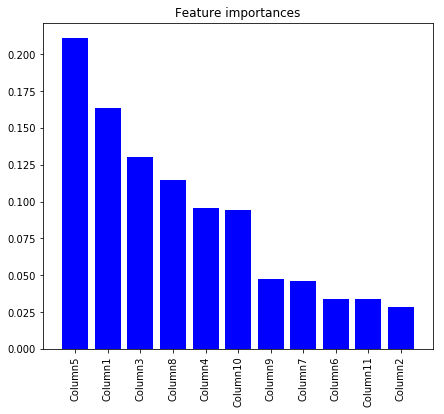

In [24]:
# Melakukan train dengan decision tree lalu melihat pemilihan atributnya
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(df_X, df_y)

feature_importances = dt.feature_importances_
indices = np.argsort(feature_importances)[::-1]

print('List features')
print(list(df_X))
print('Value (semakin besar semakin baik)')
print(feature_importances)
print()

print("Feature ranking:")
for f in range(df_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Melakukan plot
plt.figure(1, figsize=(7, 6))
plt.title("Feature importances")
plt.bar(range(df_X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(df_X.shape[1]), df_X.columns[indices],rotation=90)
plt.xlim([-1, df_X.shape[1]])
plt.show()

In [25]:
# Dengan hasil chi squared
chi_squared_features = ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 
                        'Column7', 'Column6', 'Column2', 'Column11']
df_X2_features = []

max_acc_nb = 0
max_acc_ann = 0
max_acc_dt = 0
max_acc_knn = 0

max_features_nb = []
max_features_ann = []
max_features_dt = []
max_features_knn = []

print('Chi Squared Attribute Selection')

for feature in chi_squared_features :
    print("\nCross validation average")
    df_X2_features.append(feature)
    df_X2 = df_clean[df_X2_features]
    print("List Attribute : " + str(df_X2_features))
    
    model = GaussianNB()      
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("Naive Bayes   : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_nb) :
        max_acc_nb = list_acc.mean()
        max_features_nb = copy.deepcopy(df_X2_features)

    model = MLPClassifier()
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("ANN           : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_ann) :
        max_acc_ann = list_acc.mean()
        max_features_ann = copy.deepcopy(df_X2_features)
        
    model = DecisionTreeClassifier(criterion='entropy') 
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("Decision Tree : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_dt) :
        max_acc_dt = list_acc.mean()
        max_features_dt = copy.deepcopy(df_X2_features)
        
    model = KNeighborsClassifier(n_neighbors=3)
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("KNN           : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_knn) :
        max_acc_knn = list_acc.mean()
        max_features_knn = copy.deepcopy(df_X2_features)

Chi Squared Attribute Selection

Cross validation average
List Attribute : ['Column10']
Naive Bayes   : 0.5272822199714975 0.024785838848779402
ANN           : 0.5318269691849887 0.014437260819348876
Decision Tree : 0.5712584392842098 0.03727006032796841
KNN           : 0.48120315398990765 0.13120189820403075

Cross validation average
List Attribute : ['Column10', 'Column8']
Naive Bayes   : 0.5518139419327951 0.012716573819248131
ANN           : 0.542065658359401 0.037419383847922046
Decision Tree : 0.5358549137753319 0.038791086583544084
KNN           : 0.5521556167035646 0.051735454737898395

Cross validation average
List Attribute : ['Column10', 'Column8', 'Column1']
Naive Bayes   : 0.5403519486819816 0.03454611989230022
ANN           : 0.5390807202269448 0.03287577886062282
Decision Tree : 0.4837271665964559 0.06251004433609898
KNN           : 0.5033569612750853 0.041024540029810264

Cross validation average
List Attribute : ['Column10', 'Column8', 'Column1', 'Column9']
Naive Bayes

In [26]:
# Max Performance
print("Max Performance")
print("Algoritma = Naive Bayes")
print("> Rata-rata akurasi : " + str(max_acc_nb))
print("> Features : " + str(max_features_nb))

print()
print("Algoritma = ANN")
print("> Rata-rata akurasi : " + str(max_acc_ann))
print("> Features : " + str(max_features_ann))

print()
print("Algoritma = Decision Tree")
print("> Rata-rata akurasi : " + str(max_acc_dt))
print("> Features : " + str(max_features_dt))

print()
print("Algoritma = KNN")
print("> Rata-rata akurasi : " + str(max_acc_knn))
print("> Features : " + str(max_features_knn))

Max Performance
Algoritma = Naive Bayes
> Rata-rata akurasi : 0.6196360968324535
> Features : ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6', 'Column2', 'Column11']

Algoritma = ANN
> Rata-rata akurasi : 0.5586279006713335
> Features : ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7']

Algoritma = Decision Tree
> Rata-rata akurasi : 0.5712584392842098
> Features : ['Column10']

Algoritma = KNN
> Rata-rata akurasi : 0.5521556167035646
> Features : ['Column10', 'Column8']


In [27]:
# Dengan pendekatan decision tree
indices

df_X2_features = []

max_acc_nb = 0
max_acc_ann = 0
max_acc_dt = 0
max_acc_knn = 0

max_features_nb = []
max_features_ann = []
max_features_dt = []
max_features_knn = []

print('Tree Approach Attribute Selection')

for index in indices :
    print("\nCross validation average")
    df_X2_features.append(list(df_X)[index])
    df_X2 = df_clean[df_X2_features]
    
    print("List Attribute : " + str(df_X2_features))
    
    model = GaussianNB()      
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("Naive Bayes   : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_nb) :
        max_acc_nb = list_acc.mean()
        max_features_nb = copy.deepcopy(df_X2_features)

    model = MLPClassifier()
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("ANN           : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_ann) :
        max_acc_ann = list_acc.mean()
        max_features_ann = copy.deepcopy(df_X2_features)
        
    model = DecisionTreeClassifier(criterion='entropy') 
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("Decision Tree : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_dt) :
        max_acc_dt = list_acc.mean()
        max_features_dt = copy.deepcopy(df_X2_features)
        
    model = KNeighborsClassifier(n_neighbors=3)
    list_acc = cross_val_score(model, df_X2, df_y, cv=10)
    print("KNN           : " + str(list_acc.mean()) + ' ' + str(statistics.stdev(list_acc)))
    if (list_acc.mean() > max_acc_knn) :
        max_acc_knn = list_acc.mean()
        max_features_knn = copy.deepcopy(df_X2_features)

Tree Approach Attribute Selection

Cross validation average
List Attribute : ['Column5']
Naive Bayes   : 0.5240272835644311 0.018814220061945476
ANN           : 0.4555521835142379 0.12705127918502046
Decision Tree : 0.4368717732972421 0.058908516763887336
KNN           : 0.4799845555216951 0.047332051493297195

Cross validation average
List Attribute : ['Column5', 'Column1']
Naive Bayes   : 0.5224280069956708 0.03837790647811159
ANN           : 0.46328122899282065 0.09363635544196933
Decision Tree : 0.4311862922272316 0.06918884518318874
KNN           : 0.4693467439432101 0.05053185939443833

Cross validation average
List Attribute : ['Column5', 'Column1', 'Column3']
Naive Bayes   : 0.5861342252328157 0.018203181424018628
ANN           : 0.49218355065027036 0.08867005736066116
Decision Tree : 0.5070275177244576 0.07348672186068117
KNN           : 0.4841909210891915 0.04402526316485858

Cross validation average
List Attribute : ['Column5', 'Column1', 'Column3', 'Column8']
Naive Bayes   

In [28]:
# Max Performance
print("Max Performance")
print("Algoritma = Naive Bayes")
print("> Rata-rata akurasi : " + str(max_acc_nb))
print("> Features : " + str(max_features_nb))

print()
print("Algoritma = ANN")
print("> Rata-rata akurasi : " + str(max_acc_ann))
print("> Features : " + str(max_features_ann))

print()
print("Algoritma = Decision Tree")
print("> Rata-rata akurasi : " + str(max_acc_dt))
print("> Features : " + str(max_features_dt))

print()
print("Algoritma = KNN")
print("> Rata-rata akurasi : " + str(max_acc_knn))
print("> Features : " + str(max_features_knn))

Max Performance
Algoritma = Naive Bayes
> Rata-rata akurasi : 0.6196360968324535
> Features : ['Column5', 'Column1', 'Column3', 'Column8', 'Column4', 'Column10', 'Column9', 'Column7', 'Column6', 'Column11', 'Column2']

Algoritma = ANN
> Rata-rata akurasi : 0.5619704090069823
> Features : ['Column5', 'Column1', 'Column3', 'Column8', 'Column4', 'Column10', 'Column9']

Algoritma = Decision Tree
> Rata-rata akurasi : 0.5358437659654565
> Features : ['Column5', 'Column1', 'Column3', 'Column8', 'Column4', 'Column10', 'Column9', 'Column7']

Algoritma = KNN
> Rata-rata akurasi : 0.5161214136543306
> Features : ['Column5', 'Column1', 'Column3', 'Column8']


Dipilih algoritma Naive Bayes. Melakukan K-Fold pada features yang menghasilkan 3 akurasi tertinggi (dengan harapan ada ditemukan model terbaik)
1. ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6', 'Column2', 'Column11']
2. ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6', 'Column2']
3. ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6']

Algoritma : Naive Bayes
Features  : ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6', 'Column2', 'Column11', 'Column14']
akurasinya sebesar = 0.6885245901639344
akurasinya sebesar = 0.6557377049180327
akurasinya sebesar = 0.639344262295082
akurasinya sebesar = 0.5081967213114754
akurasinya sebesar = 0.5737704918032787
akurasinya sebesar = 0.5409836065573771
akurasinya sebesar = 0.6229508196721312
akurasinya sebesar = 0.5245901639344263
akurasinya sebesar = 0.7868852459016393
akurasinya sebesar = 0.45

Max Performance
akurasinya sebesar = 0.7868852459016393


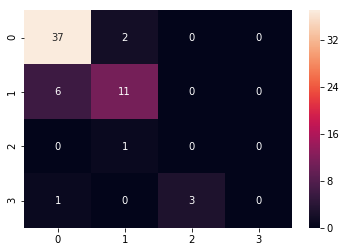

In [29]:
# Membuat KFold dengan k = 10
kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

max_features = ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 
                'Column7', 'Column6', 'Column2', 'Column11'] + ['Column14']

df_kfold = df_clean[max_features]
acc1_max = 0
train1_max = []
test1_max = []

print('Algoritma : Naive Bayes')
print('Features  : ' + str(max_features))

for train, test in kf.split(df_kfold) :
    # membuat model
    model = GaussianNB()
    
    # membagi data menjadi X dan y (test dan train)
    df_train = df_kfold.iloc[train]
    df_test = df_kfold.iloc[test]
    X_train = df_train.drop(['Column14'], axis = 1)
    y_train = df_train['Column14']
    X_test = df_test.drop(['Column14'], axis = 1)
    y_test = df_test['Column14']
    
    # melakukan pemodelan
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
    
    if (accuracy_score(y_pred, y_test) > acc1_max) :
        acc1_max = accuracy_score(y_pred, y_test)
        train1_max = copy.deepcopy(train)
        test1_max = copy.deepcopy(test)
        
print()
print('Max Performance')
model = GaussianNB()
df_train = df_kfold.iloc[train1_max]
df_test = df_kfold.iloc[test1_max]
X_train = df_train.drop(['Column14'], axis = 1)
y_train = df_train['Column14']
X_test = df_test.drop(['Column14'], axis = 1)
y_test = df_test['Column14']

# melakukan pemodelan
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Algoritma : Naive Bayes
Features  : ['Column5', 'Column1', 'Column3', 'Column4', 'Column10', 'Column8', 'Column7', 'Column9', 'Column11', 'Column6', 'Column14']
akurasinya sebesar = 0.6721311475409836
akurasinya sebesar = 0.7049180327868853
akurasinya sebesar = 0.6885245901639344
akurasinya sebesar = 0.47540983606557374
akurasinya sebesar = 0.6229508196721312
akurasinya sebesar = 0.5409836065573771
akurasinya sebesar = 0.6065573770491803
akurasinya sebesar = 0.5573770491803278
akurasinya sebesar = 0.7704918032786885
akurasinya sebesar = 0.45

Max Performance
akurasinya sebesar = 0.7704918032786885


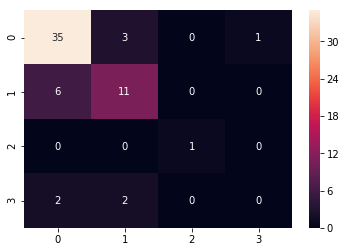

In [30]:
# Membuat KFold dengan k = 10
kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

max_features = ['Column5', 'Column1', 'Column3', 'Column4', 'Column10', 'Column8', 
                'Column7', 'Column9', 'Column11', 'Column6'] + ['Column14']

df_kfold = df_clean[max_features]
acc2_max = 0
train2_max = []
test2_max = []

print('Algoritma : Naive Bayes')
print('Features  : ' + str(max_features))

for train, test in kf.split(df_kfold) :
    # membuat model
    model = GaussianNB()
    
    # membagi data menjadi X dan y (test dan train)
    df_train = df_kfold.iloc[train]
    df_test = df_kfold.iloc[test]
    X_train = df_train.drop(['Column14'], axis = 1)
    y_train = df_train['Column14']
    X_test = df_test.drop(['Column14'], axis = 1)
    y_test = df_test['Column14']
    
    # melakukan pemodelan
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
    
    if (accuracy_score(y_pred, y_test) > acc2_max) :
        acc2_max = accuracy_score(y_pred, y_test)
        train2_max = train
        test2_max = test
        
print()
print('Max Performance')
model = GaussianNB()
df_train = df_kfold.iloc[train2_max]
df_test = df_kfold.iloc[test2_max]
X_train = df_train.drop(['Column14'], axis = 1)
y_train = df_train['Column14']
X_test = df_test.drop(['Column14'], axis = 1)
y_test = df_test['Column14']

# melakukan pemodelan
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Algoritma : Naive Bayes
Features  : ['Column5', 'Column1', 'Column3', 'Column4', 'Column10', 'Column8', 'Column7', 'Column9', 'Column11', 'Column14']
akurasinya sebesar = 0.4262295081967213
akurasinya sebesar = 0.5737704918032787
akurasinya sebesar = 0.5901639344262295
akurasinya sebesar = 0.45901639344262296
akurasinya sebesar = 0.6885245901639344
akurasinya sebesar = 0.6721311475409836
akurasinya sebesar = 0.639344262295082
akurasinya sebesar = 0.7540983606557377
akurasinya sebesar = 0.6557377049180327
akurasinya sebesar = 0.65

Max Performance
akurasinya sebesar = 0.7540983606557377


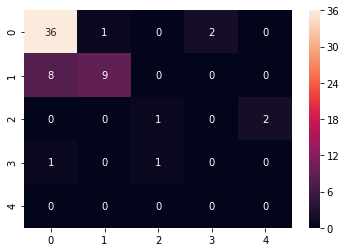

In [31]:
# Membuat KFold dengan k = 10
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

max_features = ['Column5', 'Column1', 'Column3', 'Column4', 'Column10', 
                'Column8', 'Column7', 'Column9', 'Column11'] + ['Column14']

df_kfold = df_clean[max_features]
acc3_max = 0
train3_max = []
test3_max = []

print('Algoritma : Naive Bayes')
print('Features  : ' + str(max_features))

for train, test in kf.split(df_kfold) :
    # membuat model
    model = GaussianNB()
    
    # membagi data menjadi X dan y (test dan train)
    df_train = df_kfold.iloc[train]
    df_test = df_kfold.iloc[test]
    X_train = df_train.drop(['Column14'], axis = 1)
    y_train = df_train['Column14']
    X_test = df_test.drop(['Column14'], axis = 1)
    y_test = df_test['Column14']
    
    # melakukan pemodelan
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
    
    if (accuracy_score(y_pred, y_test) > acc3_max) :
        acc3_max = accuracy_score(y_pred, y_test)
        train3_max = train
        test3_max = test
        
print()
print('Max Performance')
model = GaussianNB()
df_train = df_kfold.iloc[train3_max]
df_test = df_kfold.iloc[test3_max]
X_train = df_train.drop(['Column14'], axis = 1)
y_train = df_train['Column14']
X_test = df_test.drop(['Column14'], axis = 1)
y_test = df_test['Column14']

# melakukan pemodelan
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Dipilih 
- Algoritma : Naive Bayes
- feature : ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6', 'Column2', 'Column11']

akurasinya sebesar = 0.7868852459016393


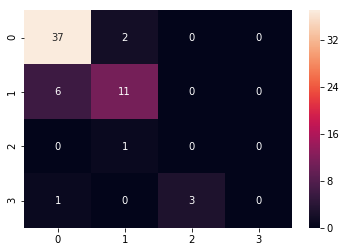

In [32]:
# final model
max_features = ['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 
                'Column4', 'Column7', 'Column6', 'Column2', 'Column11'] + ['Column14']

model = GaussianNB()

df_train = df_clean[max_features].iloc[train2_max]
df_test = df_clean[max_features].iloc[test2_max]
X_train = df_train.drop(['Column14'], axis = 1)
y_train = df_train['Column14']
X_test = df_test.drop(['Column14'], axis = 1)
y_test = df_test['Column14']

# melakukan pemodelan
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('akurasinya sebesar = ' + str(accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

#### Menyimpan model

In [33]:
# menyimpan model
filename_gnb = 'gnb_model.sav'

joblib.dump(model, filename_gnb)

['gnb_model.sav']

#### Memprediksi data test

In [34]:
# Membuka file test
df_test = pd.read_csv('tubes2_HeartDisease_test.csv')

In [35]:
df_test.head()

Column1  Column2  Column3 Column4 Column5 Column6  Column7 Column8 Column9  \
0       60        1        2     160     267       1        1     157       0   
1       61        1        4     148     203       0        0     161       0   
2       54        1        4     130     242       0        0      91       1   
3       48        1        4     120     260       0        0     115       0   
4       57        0        1     130     308       0        0      98       0   

  Column10 Column11 Column12 Column13  
0      0.5        2        ?        ?  
1        0        1        1        7  
2        1        2        ?        ?  
3        2        2        ?        ?  
4        1        2        ?        ?

Melakukan cleaning data sesuai dengan data train

In [36]:
# mengganti '?' ke NaN
df_test = df_test.replace('?', np.nan)

In [37]:
df_test.isnull().sum()

Column1      0
Column2      0
Column3      0
Column4     12
Column5      6
Column6     12
Column7      0
Column8     11
Column9     11
Column10    13
Column11    47
Column12    97
Column13    78
dtype: int64

In [38]:
# drop Column12 dan Column13
df_test = df_test.drop(columns=['Column12', 'Column13'])

In [39]:
# mengganti type dari object ke numeric
object_type = ['Column4','Column5','Column6','Column7','Column8','Column9','Column10','Column11']
df_test[object_type] = df_test[object_type].apply(pd.to_numeric, downcast='float', errors='coerce', axis=1)

In [40]:
median_type = ['Column4', 'Column5', 'Column8']
mode_type = ['Column6', 'Column7', 'Column9', 'Column11']
mean_type = ['Column10']

for feature in median_type :
    df_test[feature] = df_test[feature].fillna(default_value[feature])
    
for feature in mode_type :
    df_test[feature] = df_test[feature].fillna(default_value[feature])
    
for feature in mean_type :
    df_test[feature] = df_test[feature].fillna(default_value[feature])

In [41]:
df_test.isnull().sum()

Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
dtype: int64

In [42]:
# mengganti type sesuai dengan yang seharusnya
float_type = ['Column10']
int_type = ['Column4','Column5','Column6','Column7','Column8','Column9','Column11']

df_test[float_type] = df_test[float_type].astype(float)
df_test[int_type] = df_test[int_type].astype(int)

In [43]:
# Memanggil model yang telah disimpan
model_load = joblib.load(filename_gnb)

In [44]:
print("Features :")
print(max_features)

try:
    max_features.remove('Column14')
except ValueError:
    pass  # do nothing!

X_test = df_test[max_features]
y_test_pred = model.predict(X_test)

Features :
['Column10', 'Column8', 'Column1', 'Column9', 'Column5', 'Column3', 'Column4', 'Column7', 'Column6', 'Column2', 'Column11', 'Column14']


#### Hasil Prediksi

In [45]:
print("Hasil Prediksi")
print(y_test_pred)

Hasil Prediksi
[0 0 1 1 0 0 2 1 0 4 1 1 0 0 0 2 1 0 0 0 0 1 0 2 0 0 1 2 3 0 0 1 4 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 4 1 1 1 0 2 2 0 1 0 1 1 0 0 0 1 2 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 2 1 1 0 2 1 0 3 1 1 0 0 1 0 0 0 1 1 0 2 0 0 0 2 0 0 0 1 4 0
 0 3 0 0 2 0 3 0 2 2 1 0 1 1 0 0 2 3 0 0 1 4 0 2 3 0 0 0 0 0]
